## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.collections import LineCollection
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
import os
from pyhdf import SD
%matplotlib inline

# TCCON data from Ny Ålesund


## Dataset resources

**Title:** NDACC FTIR O$_3$ profiles from Ny Ålesund, Svalbard

**Author** Mathias Palm

**Year** 2019

**Institute** Institute of Environmental Physics, University of Bremen, Bremen (DE)

**Data hosted at** [FTP Access](ftp://ftp.cpc.ncep.noaa.gov/ndacc/station/nyalsund/hdf/ftir/)

**DOI** *no DOI assigned yet*

**License**    [TCCON Data Use Policy](https://data.caltech.edu/tindfiles/serve/90348ea4-f340-4f43-8db2-b9beb7845519/)


## Abstract
Profile retrieval results of Ozone at Ny-Ålesund, Svalbard. Derived from solar absorption spectra, measured with the Fourier-Transform InfraRed (FTIR) Spectrometer, hosted at the AWIPEV observatory.

## Reading example dataset

The dataset can be downloaded via the link above and saved in the current working directory of this notebook. The HDF file can be opened and read with pyhdf. Parameter description can be printed.

In [2]:
datafolder = '../ac3/INF/pangaea_download/'
fname = 'groundbased_ftir.o3_awi001_ny.alesund_20170403t140027z_20170915t111845z_005.hdf'

data = SD.SD(os.path.join(datafolder, fname))
o3vmr = data.select('O3.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR')
for k in o3vmr.attributes().keys():
    print (k, o3vmr.attributes()[k])
o3vmr = o3vmr.get()[:]

o3col = data.select('O3.COLUMN_ABSORPTION.SOLAR').get()[:]
o3vmr_ap = data.select('O3.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR_APRIORI').get()[:]
o3vmr_avk = data.select('O3.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR_AVK').get()[:]
alt = data.select('ALTITUDE').get()
dat = np.array([dt.datetime(d.year, d.month, d.day, d.hour, d.minute, d.second) for d in dates.num2date(data.select('DATETIME').get()+730120.0)])
data.end()


VAR_NAME O3.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR
VAR_DESCRIPTION Retrieved mixing ratio profile of O3 
VAR_NOTES Retrieval algorithm sfit4 version: 0.9 NDACC IRWG retrieval strategy. HITRAN2008 spectroscopy
VAR_SIZE 52;48
VAR_DEPEND DATETIME;ALTITUDE
VAR_DATA_TYPE REAL
VAR_UNITS ppmv
VAR_SI_CONVERSION 0.0;1.0E-6;1
VAR_VALID_MIN -0.7575700283050537
VAR_VALID_MAX 7.575699806213379
VAR_FILL_VALUE -90000.0
VALID_RANGE [-0.7575700283050537, 7.575699806213379]
units ppmv
_FillValue -90000.0


## Ozone profile plot

Using Matplotlib's LineCollection method, the day of year cann be assigned a color and the profiles displayed in bulk, with the color showing the time information.

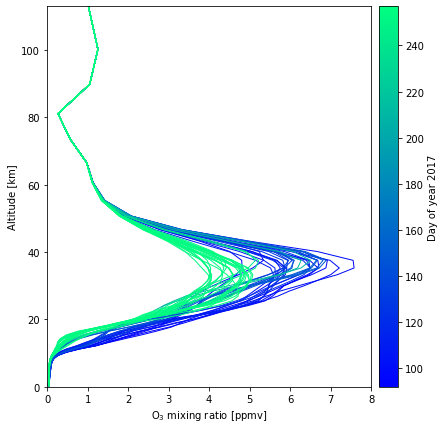

In [3]:
Coll = [list(zip(o3vmr[i], alt)) for i in range(o3vmr.shape[0])]

cmap = plt.get_cmap('winter')
line_segments = LineCollection(Coll, cmap=cmap, linewidth=1)
line_segments.set_array(np.array([i.toordinal()-dt.datetime(2017,1,1).toordinal() for i in dat]))

fig, ax = plt.subplots(1, figsize=(7,7))
ax.set_xlabel('O$_3$ mixing ratio [ppmv]')
ax.set_ylabel('Altitude [km]')
ax.set_xlim(0,8)
ax.set_ylim(0,max(alt))
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments, pad=0.02)
axcb.set_label('Day of year 2017')